### Project 2
1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

In [27]:
##Loading the Data:

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

node_edge_path = "https://raw.githubusercontent.com/jonburns2454/Data-620/master/DATA/soc-political-retweet.edges"
node_edge_data = pd.read_csv(node_edge_path, sep=',', header=None, names=['node', 'edge', 'weight'])

node_label_path = "https://raw.githubusercontent.com/jonburns2454/Data-620/master/DATA/soc-political-retweet.node_labels"
node_label_data = pd.read_csv(node_label_path, sep=',', header=None, names=['node', 'category'])


In [28]:
# Merge DataFrames
merged_data = node_edge_data.merge(node_label_data, left_on='node', right_on='node', how='left')

# Create the graph from merged data, assuming 'source' and 'target' are the edge columns
# and 'label' is the column with node labels
G = nx.from_pandas_edgelist(merged_data, 'node', 'edge', 'category')

# Add node labels as attributes
for _, row in merged_data.iterrows():
    G.nodes[row['node']]['category'] = row['category']

In [29]:
merged_data.head(3)

,node,edge,weight,category
0,12464,7349,1286901355,1
1,6820,12569,1287988962,2
2,4336,15967,1286535938,1


In [30]:
print(G)

Graph with 18470 nodes and 48053 edges


In [31]:
##Create NetworkX Graph Object
weight_nodes = merged_data[['node','edge','weight','category']].drop_duplicates().sort_values(by='node')
G = nx.Graph()
G.add_nodes_from(merged_data['weight'], bipartite=0)
G.add_nodes_from(merged_data['category'], bipartite=1)
G.add_weighted_edges_from([tuple(d) for d in merged_data[['weight','category','node']].values])

In [32]:
list(G.nodes(data=True))[:3]
list(G.nodes(data=True))[-2:]

[(1, {'bipartite': 1}), (2, {'bipartite': 1})]

In [33]:
##Set 'Top' and 'Bottom' Nodes:
weight_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
weight_nodes = set(G) - weight_nodes

In [34]:
import networkx as nx
from networkx.algorithms import bipartite as bi
print(bi.density(G, weight_nodes))

0.5025123551676832


In [35]:
def set_colors(G):
    colors = []
    for node, data in G.nodes(data=True):
        if data['bipartite'] == 1: 
            colors.append('olivedrab')   
        else:
            colors.append('cornflowerblue') 
    return colors

In [ ]:
plt.rcParams["figure.figsize"] = (15,15) # set plot size
colors = set_colors(G)  # set colors
#weights = [math.log(edata['attr_dict'][200]) for f, t, edata in G0.edges(data=True)] # set weights

nx.draw(G, node_color=colors, node_size=200, 
        font_size=10, font_weight='bold', edge_color="skyblue", alpha=0.5)

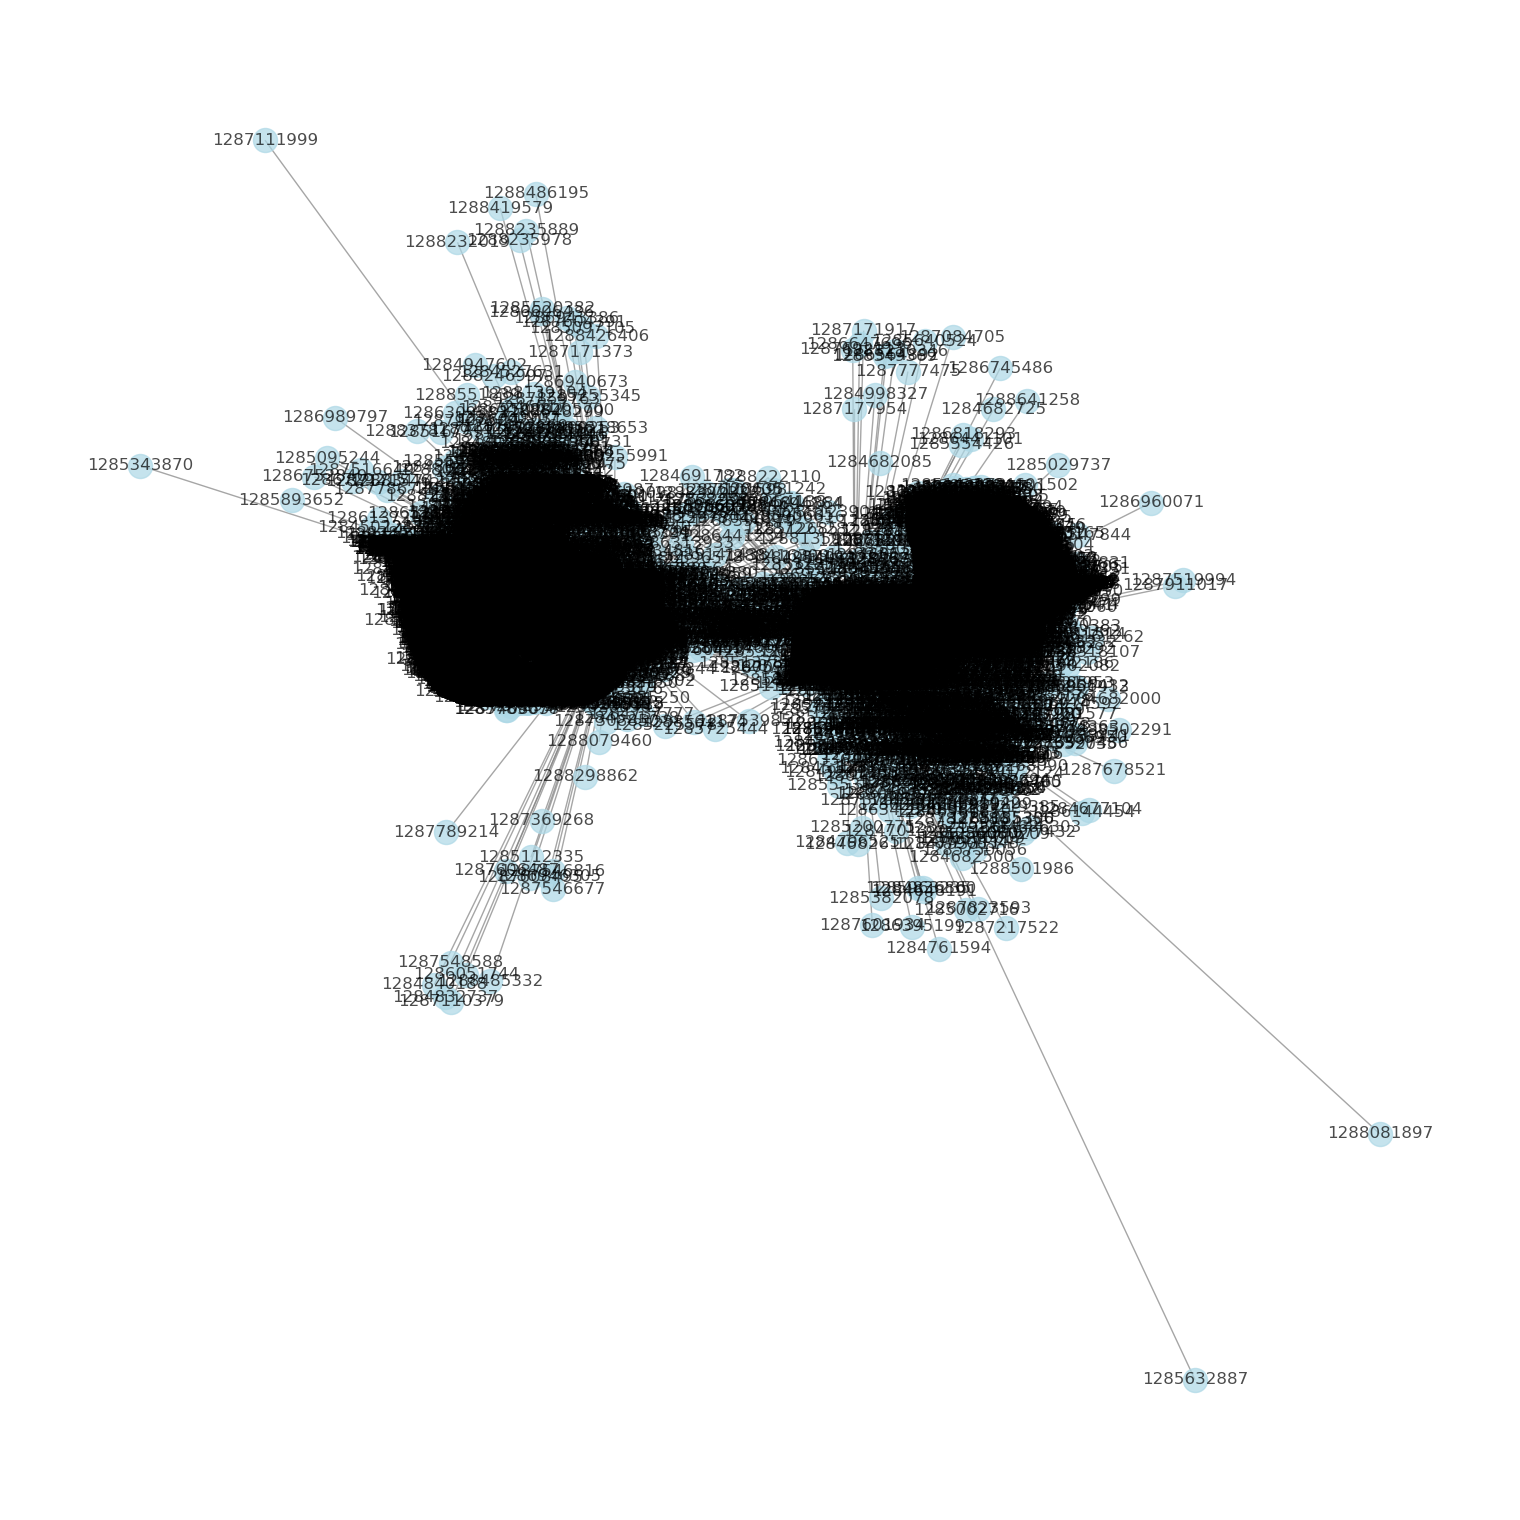

In [14]:
import networkx as nx

def island_method(G, threshold):
    H = nx.Graph()
    
    for f, t, edata in G.edges(data=True):
        if edata.get('weight', 0) > threshold:
            H.add_node(f)
            H.add_node(t)
            H.add_edge(f, t, weight=edata['weight'])
    
    return H

threshold_value = 0.5 
reduced_G = island_method(G, threshold_value)
nx.draw(reduced_G, with_labels=True, node_color='lightblue', edge_color='gray', alpha=0.7)

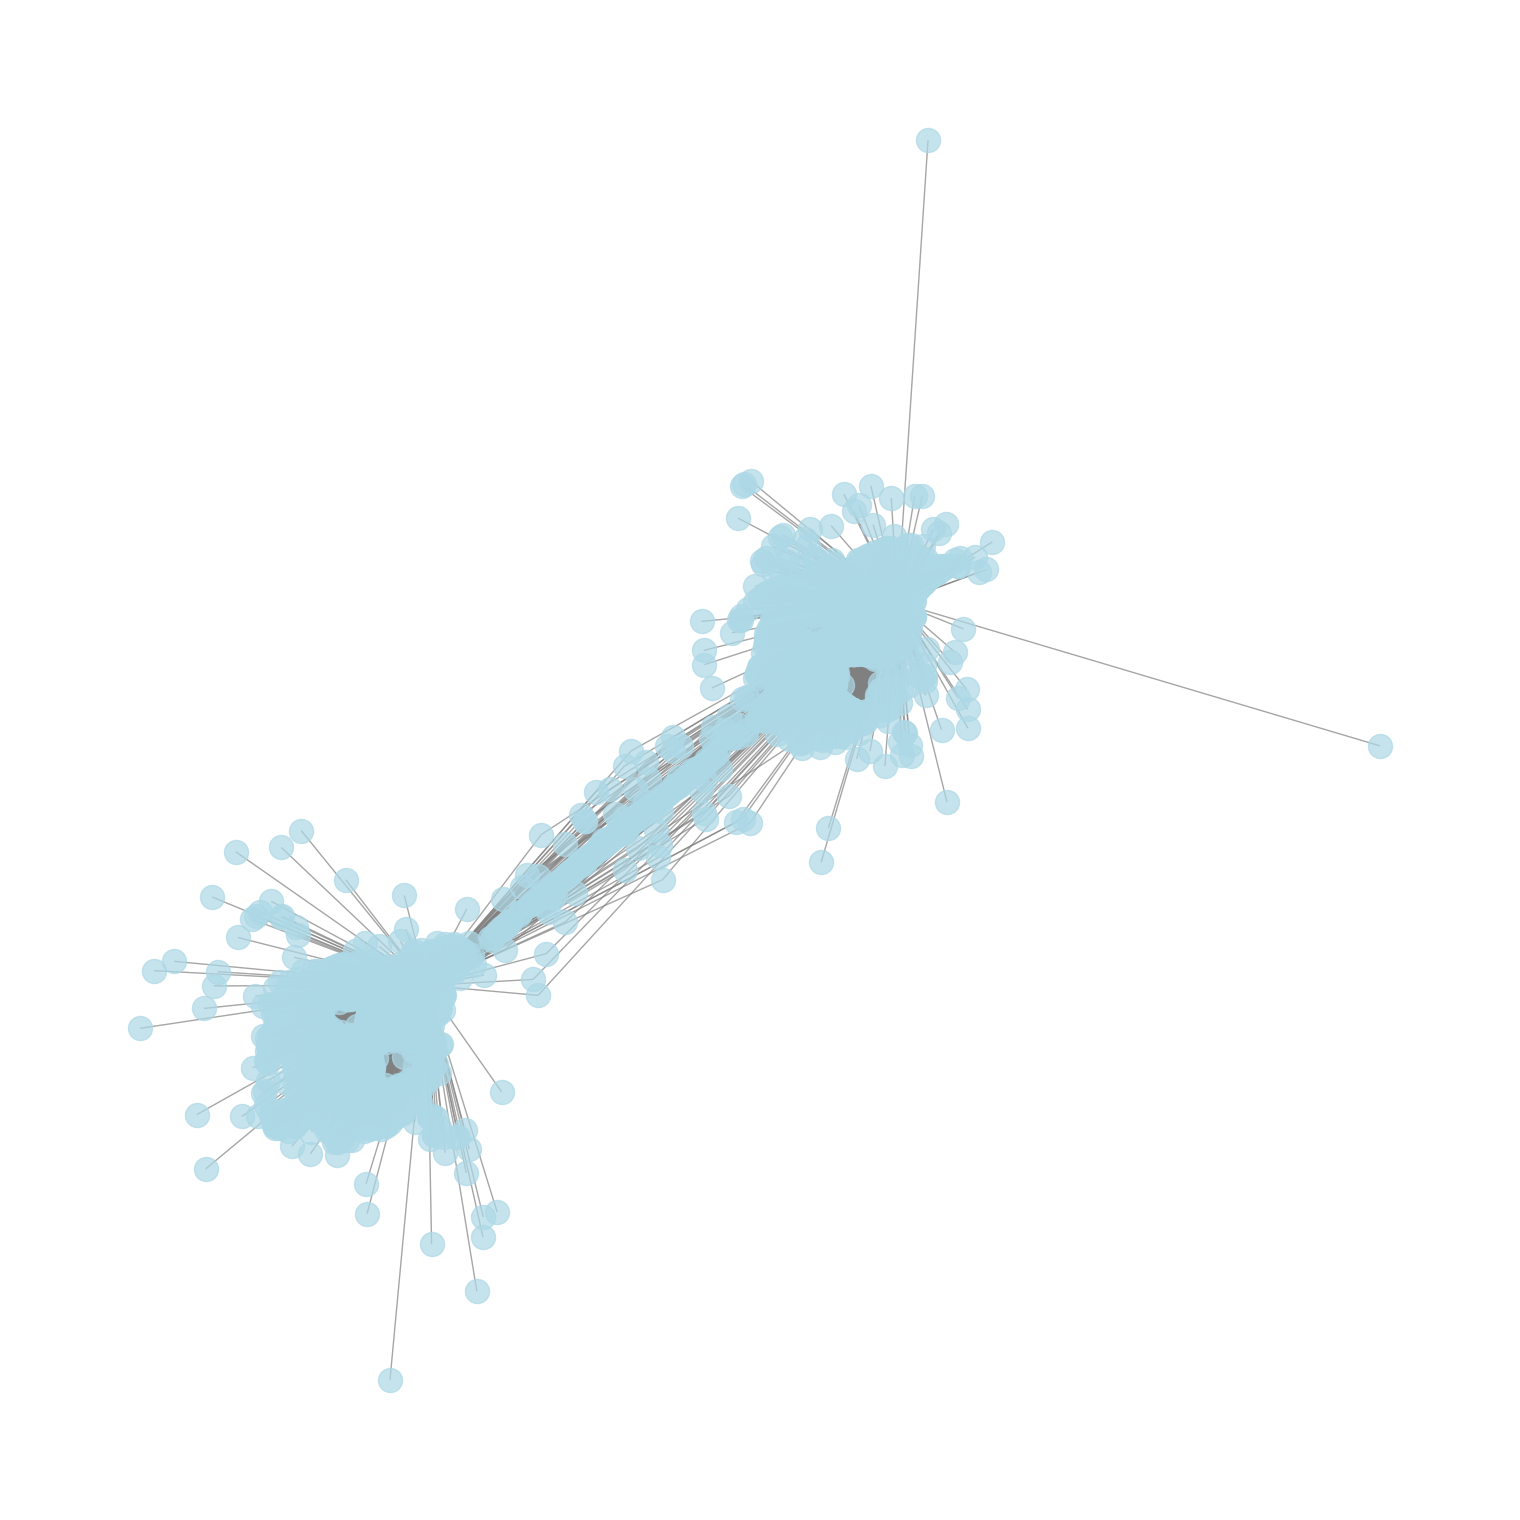

In [15]:
import networkx as nx

def island_method(G, threshold):
    H = nx.Graph()
    
    # Iterate over all edges in the original graph
    for f, t, edata in G.edges(data=True):
        if edata.get('weight', 0) > threshold:
            H.add_node(f)
            H.add_node(t)
            H.add_edge(f, t, weight=edata['weight'])
    
    return H

threshold_value = 0.5 
reduced_G = island_method(G, threshold_value)

# Now you can visualize the reduced graph
nx.draw(reduced_G, with_labels=False, node_color='lightblue', edge_color='gray', alpha=0.7)

### Analysis
Our graph for project 2 shows some clear grouping between the data with the right and left groups likely being clustering of left leaning and right leaning political retweets with twitter accounts.
This also shows, while there is a high level of interconnectedness, these groups are distinctly different and tend to stay within their own sphere of twitter.

Lastly, these graphs encapsulate the continued political polarization of twitter users. This data is not up to date either, if we had newer data for this project, we would expect there to be even tighter clustering, showing even more polarization of twitter. Further research would need to be done to identify exactly what each cluster represents, but it is clear that left and right leaning are the main features.